# Neural Network on MNIST dataSet
### 1 vs 5 Classification

Import Libraries

In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Extract Data from csv files

In [25]:
train_path = "Data/train_pr4.csv"
data = pd.read_csv(train_path)

In [26]:
data = np.array(data)    # keep data in array form
m,n = data.shape
np.random.shuffle(data)  # shuffle data

print("Input DataSet Shape:", data.shape)

# Training data features and labels
data_train = data.T
y = data_train[0]      # features
X = data_train[1:n]    # labels
X = X / 255.

print(y.shape)
print(X[:,0].shape)

Input DataSet Shape: (12163, 785)
(12163,)
(784,)


Initialize Parameters

In [27]:

def randParams():
    """
    get randomized initial weight and bias parameters
    for hidden Layer 1 and hidden Layer 2
    """
    n = 10 # predict out of 10 possible features [0 to 9]
    W1 = np.random.rand(n, 784) - 0.5
    b1 = np.random.rand(n, 1) - 0.5
    W2 = np.random.rand(n, n) - 0.5
    b2 = np.random.rand(n, 1) - 0.5

    return(W1, b1, W2, b2)

def ReLU(Z):
    """ 
    ReLU activation function 
    output (-ve become 0)
    """
    return(np.maximum(Z,0))

def dReLU(Z):
    """ 
    differential of ReLU function
    if Z>0 --> gradient is 1
    else   --> gradient is 0
    """
    return(Z > 0)

def softmax(Z):
    """
    compute softmax score
    output probabilities
    """
    ex = np.exp(Z)
    return(ex/sum(ex))

def forward_pass(W1, b1, W2, b2, X):
    """
    execute forward pass --> get loss
    activation layer is ReLU
    final layer, loss function, is Softmax
    """
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)  
    
    return(Z1,A1,Z2,A2)


def one_hot(Y):
    """
    one hot the labels
    build an array of 0s, only sepceified label is 1
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 5))
    # one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return(one_hot_Y)

def backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y):
    """
    execute backwards pass --> get adjusted weights by calculating gradient losses
    requires cache values from forward pass
    """
    m = Y.size                # size of dataset
    one_hot_y = one_hot(Y)
    
    # gradient losses for layer 2 parameters
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    # gradient losses for layer 1 parameters
    dZ1 =  W2.T.dot(dZ2) * dReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return(dW1, db1, dW2, db2)

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """
    compute updated weights and biases for next forward pass
    """
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return(W1, b1, W2, b2)



In [28]:
def predict(A2):
    """
    after softmax step, extraxt label value with highest probability
    """
    return(np.argmax(A2,0))

def accuracy(p, Y):
    """
    measure accuracy --> correctly predicted labels / dataset size
    """
    acc = np.sum(p == Y) / Y.size
    return(acc)

def gradient_descent(X,Y,lr,iterations):
    """
    get initial parameters and run forward_prop --> backward_prop loop
    """
    accList = []
    W1, b1, W2, b2 = randParams()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_pass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        acc_val = accuracy(predict(A2), Y)
        accList.append(acc_val*100)
        if i % 25 == 0:
            print("=======================================")
            print("Number of Epochs -->", i)
            print("Accuracy: ", round(acc_val*100,3))
    return(W1, b1, W2, b2, accList)



# Neural Network on Training Set

In [29]:
iterations = 100
lr = 0.10

W1, b1, W2, b2, accList = gradient_descent(X,y,lr,iterations)

Number of Epochs --> 0
Accuracy:  1.077
Number of Epochs --> 25
Accuracy:  97.69
Number of Epochs --> 50
Accuracy:  98.339
Number of Epochs --> 75
Accuracy:  98.561


Visualize Training Accuracy with Iterations

Training Accuracy -->  98.685  %


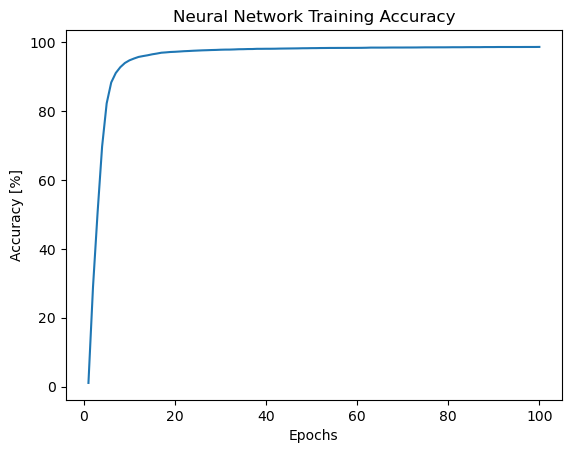

In [30]:
itList = np.arange(1,iterations+1)

plt.plot(itList,accList)
# general plot formatting
plt.xlabel("Epochs")
plt.ylabel("Accuracy [%]")
plt.title("Neural Network Training Accuracy")

print("Training Accuracy --> ", round(accList[-1],3), " %")

Sample Prediction Results

Predicted Label  5
True Label:  5


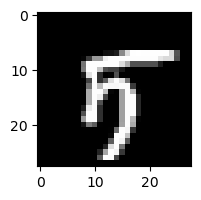

Predicted Label  5
True Label:  5


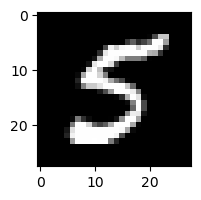

Predicted Label  5
True Label:  5


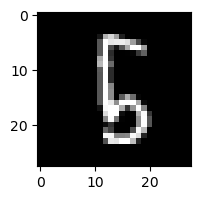

Predicted Label  5
True Label:  5


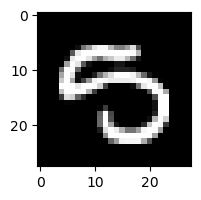

In [31]:

def test_prediction(idx, W1, b1, W2, b2, X, Y, output = False):
    """
    makes prediction for any input digit image
    run a forward pass using learned weights and biases
    """
    img_X = X[:, idx, None]        # get 784 pixels, as array 784x1
    _,_,_,A2 = forward_pass(W1, b1, W2, b2, img_X)   
    y_pred = predict(A2)

    if output == True:
        print("Predicted Label ", y_pred[0])
        print("True Label: ", Y[idx])
        # plot Image
        img = img_X.reshape((28, 28)) * 255
        f = plt.figure()
        f.set_figwidth(2)
        f.set_figheight(2)
        plt.gray()
        plt.imshow(img)
        plt.show()
        
    return(None)

# make prediction using learned parameters W1, b1, W2, b2
test_prediction( 111, W1, b1, W2, b2, X, y, output = True)
test_prediction(2222, W1, b1, W2, b2, X, y, output = True)
test_prediction(5555, W1, b1, W2, b2, X, y, output = True)
test_prediction(8888, W1, b1, W2, b2, X, y, output = True)

# Neural Network on Test Set

In [32]:
test_path = "Data/test_pr4.csv"
data = pd.read_csv(test_path)

data = np.array(data)    # keep data in array form
m,n = data.shape
np.random.shuffle(data)  # shuffle data

print("Input Dataset Shape:", data.shape)

# Training data features and labels
data_train = data.T
y = data_train[0]      # features
X = data_train[1:n]    # labels
X = X / 255.

print(y.shape)
print(X[:,0].shape)


Input Dataset Shape: (2027, 785)
(2027,)
(784,)


In [33]:
count = 0

for idx in range(m):
    img_X = X[:, idx, None]        # get 784 pixels, as array 784x1
    _,_,_,A2 = forward_pass(W1, b1, W2, b2, img_X)   
    y_pred = predict(A2)
    if y_pred[0] == y[idx]:
        count += 1
        
print("Testing Accuracy --> ", round(count*100/m,3), " %")


Testing Accuracy -->  98.915  %


Sample Prediction Results

Predicted Label  1
True Label:  1


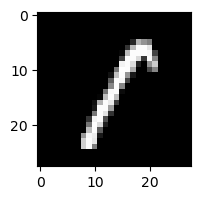

Predicted Label  1
True Label:  1


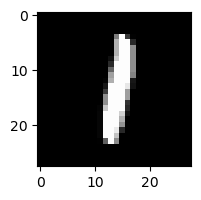

Predicted Label  1
True Label:  1


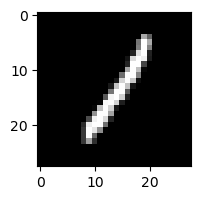

Predicted Label  1
True Label:  1


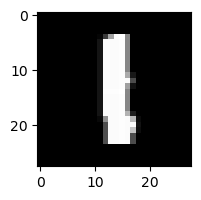

In [34]:
# make prediction using learned parameters W1, b1, W2, b2
test_prediction(500, W1, b1, W2, b2, X, y, output = True)
test_prediction(1000, W1, b1, W2, b2, X, y, output = True)
test_prediction(1500, W1, b1, W2, b2, X, y, output = True)
test_prediction(2000, W1, b1, W2, b2, X, y, output = True)